In [1]:
#installing the textblob library 
# pip install -U textblob

In [57]:
#importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import re

from textblob import TextBlob

# import nltk
# nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

In [3]:
#uploading the datasets
df_location = pd.read_csv('data/bfro_locations.csv')
df_reports_geocoded = pd.read_csv('data/bfro_reports_geocoded.csv')
df_reports = pd.read_csv('data/bfro_reports.csv')

In [4]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.5+ KB


In [5]:
df_reports_geocoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5021 non-null   int64  
 1   observed            4983 non-null   object 
 2   location_details    4260 non-null   object 
 3   county              5021 non-null   object 
 4   state               5021 non-null   object 
 5   season              5021 non-null   object 
 6   title               4045 non-null   object 
 7   latitude            4045 non-null   float64
 8   longitude           4045 non-null   float64
 9   date                4045 non-null   object 
 10  number              5021 non-null   float64
 11  classification      5021 non-null   object 
 12  geohash             4045 non-null   object 
 13  temperature_high    3338 non-null   float64
 14  temperature_mid     3186 non-null   float64
 15  temperature_low     3189 non-null   float64
 16  dew_po

In [6]:
df_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5485 entries, 0 to 5484
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5485 non-null   int64  
 1   YEAR                 5020 non-null   object 
 2   SEASON               5021 non-null   object 
 3   STATE                5021 non-null   object 
 4   COUNTY               5021 non-null   object 
 5   NEAREST_TOWN         4699 non-null   object 
 6   NEAREST_ROAD         4317 non-null   object 
 7   OBSERVED             4983 non-null   object 
 8   ALSO_NOTICED         3278 non-null   object 
 9   OTHER_WITNESSES      4467 non-null   object 
 10  OTHER_STORIES        3537 non-null   object 
 11  TIME_AND_CONDITIONS  4539 non-null   object 
 12  ENVIRONMENT          4747 non-null   object 
 13  REPORT_NUMBER        5021 non-null   float64
 14  REPORT_CLASS         5021 non-null   object 
 15  LOCATION_DETAILS     4260 non-null   o

In [7]:
df_reports.head()

,index,YEAR,SEASON,STATE,COUNTY,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,LOCATION_DETAILS,MONTH,DATE,A_&_G_References
0,0,2010,Summer,Alabama,Winston County,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,Class B,NaN,NaN,NaN,NaN
1,1,Early 1990's,Fall,Alaska,Valdez-Chitina-Whittier County,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,Class A,East side of Prince William Sound,NaN,NaN,NaN
2,2,1974,Fall,Rhode Island,Washington County,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,Class A,"Great swamp area, Narragansett Indians",September,Sunday,NaN
3,3,72 or 73,Summer,Pennsylvania,York County,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,Class B,I would rather not have exact location (listin...,NaN,NaN,NaN
4,4,1984,Spring,Oregon,Yamhill County,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,Class B,"Logging roads north west of Yamhill, OR, about...",May,NaN,NaN


In [8]:
df_location.head()

,index,number,title,classification,timestamp,latitude,longitude
0,0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.5000,-142.9000
1,1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.1872,-132.7982
2,2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.2035,-132.8202
3,3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.9375,-141.5667
4,4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.0595,-149.7853


In [9]:
pd.set_option('display.max_columns', None)
df_reports_geocoded.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,30680.0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,1261.0,Class A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,6496.0,Class A,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,8000.0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,703.0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#looking into the classification column to see how many values we have for each class 
df_reports_geocoded.classification.value_counts()

classification
Class B    2510
Class A    2481
Class C      30
Name: count, dtype: int64

In [11]:
#seeing if the classification column in this dataset is consistent with the other datasets
df_location.classification.value_counts()

classification
Class B    2138
Class A    2093
Class C      19
Name: count, dtype: int64

In [12]:
#seeing if the classification column in this dataset is consistent with the other datasets
df_reports.REPORT_CLASS.value_counts()

REPORT_CLASS
Class B    2510
Class A    2481
Class C      30
Name: count, dtype: int64

In [13]:
#merging df_reports_geocoded and df_reports
merged_df = df_reports.merge(df_reports_geocoded, left_on='OBSERVED', right_on='observed')
merged_df

,index_x,YEAR,SEASON,STATE,COUNTY,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,REPORT_CLASS,LOCATION_DETAILS,MONTH,DATE,A_&_G_References,index_y,observed,location_details,county,state,season,title,latitude,longitude,date,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,2010,Summer,Alabama,Winston County,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,Class B,NaN,NaN,NaN,NaN,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,30680.0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Early 1990's,Fall,Alaska,Valdez-Chitina-Whittier County,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,Class A,East side of Prince William Sound,NaN,NaN,NaN,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,1261.0,Class A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1974,Fall,Rhode Island,Washington County,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,Class A,"Great swamp area, Narragansett Indians",September,Sunday,NaN,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,6496.0,Class A,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,72 or 73,Summer,Pennsylvania,York County,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,Class B,I would rather not have exact location (listin...,NaN,NaN,NaN,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,8000.0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1984,Spring,Oregon,Yamhill County,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,Class B,"Logging roads north west of Yamhill, OR, about...",May,NaN,NaN,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,703.0,Class B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24056,5480,2005,Summer,New Mexico,Rio Arriba County,dulce nm,(withheld),while camping protecting other equipment befor...,no frist time camping there,"one nephew, my two son where sleeping",local people talk off seeing bigfoot in the ar...,"moon was half full, abou

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24061 entries, 0 to 24060
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index_x              24061 non-null  int64  
 1   YEAR                 6428 non-null   object 
 2   SEASON               6429 non-null   object 
 3   STATE                6429 non-null   object 
 4   COUNTY               6429 non-null   object 
 5   NEAREST_TOWN         6033 non-null   object 
 6   NEAREST_ROAD         5577 non-null   object 
 7   OBSERVED             4985 non-null   object 
 8   ALSO_NOTICED         4427 non-null   object 
 9   OTHER_WITNESSES      5653 non-null   object 
 10  OTHER_STORIES        4499 non-null   object 
 11  TIME_AND_CONDITIONS  5688 non-null   object 
 12  ENVIRONMENT          6007 non-null   object 
 13  REPORT_NUMBER        6429 non-null   float64
 14  REPORT_CLASS         6429 non-null   object 
 15  LOCATION_DETAILS     5409 non-null  

In [15]:
#dropping duplicate columns
merged_df = merged_df.drop(columns=['STATE', 'COUNTY', 'index_x', 'index_y', 'observed', 
                                    'MONTH', 'DATE', 'REPORT_CLASS', 'LOCATION_DETAILS',
                                   'SEASON', 'date'], axis=1)

In [16]:
#dropping 'A_&_G_References' column since there are way too many nulls and irrelevant 
merged_df = merged_df.drop(columns='A_&_G_References', axis=1)

In [17]:
# #dropping the null values in the 'latitude' and 'longitude' columns 
# merged_df.dropna(subset=['latitude', 'longitude'], axis=0, inplace=True)

In [18]:
#seeing how many null values are in each column
merged_df.isnull().sum()

YEAR                   17633
NEAREST_TOWN           18028
NEAREST_ROAD           18484
OBSERVED               19076
ALSO_NOTICED           19634
OTHER_WITNESSES        18408
OTHER_STORIES          19562
TIME_AND_CONDITIONS    18373
ENVIRONMENT            18054
REPORT_NUMBER          17632
location_details        4268
county                     0
state                      0
season                     0
title                   3483
latitude                3483
longitude               3483
number                     0
classification             0
geohash                 3483
temperature_high        8699
temperature_mid         9352
temperature_low         9349
dew_point               8664
humidity                8664
cloud_cover             9454
moon_phase              8641
precip_intensity       13333
precip_probability     13335
precip_type            14823
pressure               12424
summary                 8671
uv_index                8645
visibility              9990
wind_bearing  

In [19]:
#dropping the null values in the OBSERVED column
merged_df.dropna(subset=['OBSERVED'], axis=0, inplace=True)

In [20]:
#dropping rows that contain Class C since we only have 30 of them 
merged_df = merged_df[merged_df['classification'] != 'Class C']

In [21]:
#making sure the class c category is dropped 
merged_df['classification'].unique()

array(['Class B', 'Class A'], dtype=object)

In [22]:
#replacing the values in the classification column to use as our target variable 
merged_df["classification"] = merged_df["classification"].replace({'Class B':0, 'Class A':1})

In [23]:
merged_df['classification'].value_counts()

classification
0    2499
1    2456
Name: count, dtype: int64

In [24]:
#seeing how many nulls are in each column
merged_df.isnull().sum()

YEAR                      1
NEAREST_TOWN            311
NEAREST_ROAD            684
OBSERVED                  0
ALSO_NOTICED           1717
OTHER_WITNESSES         536
OTHER_STORIES          1451
TIME_AND_CONDITIONS     454
ENVIRONMENT             263
REPORT_NUMBER             0
location_details        750
county                    0
state                     0
season                    0
title                   959
latitude                959
longitude               959
number                    0
classification            0
geohash                 959
temperature_high       1652
temperature_mid        1802
temperature_low        1799
dew_point              1617
humidity               1617
cloud_cover            1905
moon_phase             1594
precip_intensity       2265
precip_probability     2267
precip_type            3253
pressure               2364
summary                1624
uv_index               1598
visibility             1938
wind_bearing           1603
wind_speed          

In [25]:
merged_df['OBSERVED'][20720]

'I don\'t know if I\'m lucky or unlucky? I\'ve had three run in\'s with Bigfoot. My name is Steve I\'m 40 years old, and I don\'t really like to tell people about this. When you tell people, most in not so many words call you a liar! Or I don\'t beleave that stuff! I\'m sure a lot of you have experianced that. My first incident was a sighting, at night. My wife and kids and I were on county highway #21, headed back home to Babbitt from Virginia. On the curve just past the Wassa town hall road. The pasenger side high beam light had a broken mount. The light pointed to the oncomming traffic lane. As I was on the curve, I saw a very tall hairy creature walking accross the road. The bad headlight staid fixed on him as he crossed the road. I drive with one of my hands on top of the wheel, and this time it was my right hand. I pointed and tried to yell but nothing came out! Again I tried, still nothing! as it got into the ditch by a evergreen fall. I finnally was able to yell to my wife, "di

In [26]:
#tokenizing the words in OBSERVED 
text = merged_df['OBSERVED'][20720]
tokenize_words = word_tokenize(text)
tokenize_words

['I',
 'do',
 "n't",
 'know',
 'if',
 'I',
 "'m",
 'lucky',
 'or',
 'unlucky',
 '?',
 'I',
 "'ve",
 'had',
 'three',
 'run',
 'in',
 "'s",
 'with',
 'Bigfoot',
 '.',
 'My',
 'name',
 'is',
 'Steve',
 'I',
 "'m",
 '40',
 'years',
 'old',
 ',',
 'and',
 'I',
 'do',
 "n't",
 'really',
 'like',
 'to',
 'tell',
 'people',
 'about',
 'this',
 '.',
 'When',
 'you',
 'tell',
 'people',
 ',',
 'most',
 'in',
 'not',
 'so',
 'many',
 'words',
 'call',
 'you',
 'a',
 'liar',
 '!',
 'Or',
 'I',
 'do',
 "n't",
 'beleave',
 'that',
 'stuff',
 '!',
 'I',
 "'m",
 'sure',
 'a',
 'lot',
 'of',
 'you',
 'have',
 'experianced',
 'that',
 '.',
 'My',
 'first',
 'incident',
 'was',
 'a',
 'sighting',
 ',',
 'at',
 'night',
 '.',
 'My',
 'wife',
 'and',
 'kids',
 'and',
 'I',
 'were',
 'on',
 'county',
 'highway',
 '#',
 '21',
 ',',
 'headed',
 'back',
 'home',
 'to',
 'Babbitt',
 'from',
 'Virginia',
 '.',
 'On',
 'the',
 'curve',
 'just',
 'past',
 'the',
 'Wassa',
 'town',
 'hall',
 'road',
 '.',
 'The',


In [27]:
#correcting the misspelled words 
text = TextBlob(str(text))
auto_correct = text.correct()
auto_correct

TextBlob("I don't know if I'm lucky or unlucky? I've had three run in's with Bigfoot. By name is Steve I'm 40 years old, and I don't really like to tell people about this. When you tell people, most in not so many words call you a liar! Or I don't leave that stuff! I'm sure a lot of you have experienced that. By first incident was a fighting, at night. By wife and kiss and I were on county highway #21, headed back home to Rabbit from Virginia. In the curve just past the Pass town hall road. The passenger side high beam light had a broken mount. The light pointed to the oncoming traffic lane. Is I was on the curve, I saw a very tall hairy creature walking across the road. The bad headlight staid fixed on him as he crossed the road. I drive with one of my hands on top of the wheel, and this time it was my right hand. I pointed and tried to yell but nothing came out! Again I tried, still nothing! as it got into the ditch by a evergreen fall. I finally was able to yell to my wife, "did you

In [28]:
#tokening each word to a list of elements 
tokenize_words = word_tokenize(str(auto_correct))
tokenize_words

['I',
 'do',
 "n't",
 'know',
 'if',
 'I',
 "'m",
 'lucky',
 'or',
 'unlucky',
 '?',
 'I',
 "'ve",
 'had',
 'three',
 'run',
 'in',
 "'s",
 'with',
 'Bigfoot',
 '.',
 'By',
 'name',
 'is',
 'Steve',
 'I',
 "'m",
 '40',
 'years',
 'old',
 ',',
 'and',
 'I',
 'do',
 "n't",
 'really',
 'like',
 'to',
 'tell',
 'people',
 'about',
 'this',
 '.',
 'When',
 'you',
 'tell',
 'people',
 ',',
 'most',
 'in',
 'not',
 'so',
 'many',
 'words',
 'call',
 'you',
 'a',
 'liar',
 '!',
 'Or',
 'I',
 'do',
 "n't",
 'leave',
 'that',
 'stuff',
 '!',
 'I',
 "'m",
 'sure',
 'a',
 'lot',
 'of',
 'you',
 'have',
 'experienced',
 'that',
 '.',
 'By',
 'first',
 'incident',
 'was',
 'a',
 'fighting',
 ',',
 'at',
 'night',
 '.',
 'By',
 'wife',
 'and',
 'kiss',
 'and',
 'I',
 'were',
 'on',
 'county',
 'highway',
 '#',
 '21',
 ',',
 'headed',
 'back',
 'home',
 'to',
 'Rabbit',
 'from',
 'Virginia',
 '.',
 'In',
 'the',
 'curve',
 'just',
 'past',
 'the',
 'Pass',
 'town',
 'hall',
 'road',
 '.',
 'The',
 'pa

In [29]:
# # Create a list of stopwords in English
# stopwords_list = stopwords.words('english')

# tokenizer = RegexpTokenizer(r"(?u)\w{3,}") #selecting words with 3 more or more characters
# stemmer = PorterStemmer()
# lemma = WordNetLemmatizer()
# # stemmer = LancasterStemmer()

In [30]:
#a function to lower, remove common words and stem the tokens
# def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    
#     #take care of the misspelled words 
#     auto_correct = TextBlob(text)
#     auto_correct = auto_correct.correct()
#     auto_correct = str(auto_correct)
#     # Standardize case (lowercase the text)
#     word = auto_correct.lower()
#     # Tokenize text using `tokenizer`
#     token = tokenizer.tokenize(word)
#     # Remove stopwords using `stopwords_list`
#     stopped_tokens = [word for word in token if word not in stopwords_list]
#     # Stem the tokenized text using `stemmer`
#     stems = [stemmer.stem(token) for token in stopped_tokens]
#     # Return the preprocessed text
#     return stems

In [31]:
# def preprocess_text(text, tokenizer, stopwords_list, lemma):
    
#     #take care of the misspelled words 
#     auto_correct = TextBlob(text)
#     auto_correct = auto_correct.correct()
#     auto_correct = str(auto_correct)
    
#     # Standardize case (lowercase the text)
#     word = auto_correct.lower()
    
#     # Tokenize text using `tokenizer`
#     token = [w for w in tokenizer.tokenize(word) if w.isalpha()]
    
#     # Remove stopwords using `stopwords_list`
#     stopped_tokens = [word for word in token if word not in stopwords_list]
    
#     # Stem the tokenized text using `stemmer`
#     lemmas = [lemma.lemmatize(token) for token in stopped_tokens]
    
#     # Return the preprocessed text
#     return lemmas

In [32]:
# text = preprocess_text(str(tokenize_words), tokenizer, stopwords_list, lemma)
# text

In [33]:
# Counter(text).most_common(20)

In [34]:
# # applying the preprocess_text function to each row of the 'OBSERVED' column
# # this takes about 2 hours to run
# text_data = merged_df.OBSERVED.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
# text_data

In [35]:
# #creating a new column for the preprocessed text 
# merged_df['preprocessed_text'] =  text_data
# merged_df

In [36]:
#checking to see all the report numbers are unique 
merged_df['number'].value_counts()

number
6478.0     2
6417.0     2
30680.0    1
36178.0    1
19339.0    1
          ..
59346.0    1
46817.0    1
42295.0    1
44808.0    1
39827.0    1
Name: count, Length: 4953, dtype: int64

In [37]:
merged_df[merged_df['number'] == 6478.0]

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
21042,1985,Charlotte,Junction of State Hwy 49 and Greenwood Road,I was sitting in my mother's kitchen with 2 of...,No odor or noise was noted at the time and thi...,Everyone was just sitting or standing around t...,NaN,This incident occurred in either June or July ...,The terrain in the area is rolling hills with ...,6478.0,This incident occurred approximately 4 miles e...,Dickson County,Tennessee,Summer,NaN,NaN,NaN,6478.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21044,1985,Charlotte,State Hwy 49 and Greenwood Road,I was sitting in my mother's kitchen with 2 of...,No odor or noise was noted at the time and thi...,Everyone was just sitting or standing around t...,NaN,This incident occurred in either June or July ...,The terrain in the area is rolling hills with ...,6417.0,This incident occurred approximately 4 miles e...,Dickson County,Tennessee,Summer,NaN,NaN,NaN,6478.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#dropping duplicates rows 
merged_df.drop_duplicates(subset='number', inplace=True)

In [39]:
merged_df['number'].value_counts()

number
30680.0    1
9507.0     1
7566.0     1
25975.0    1
1853.0     1
          ..
62558.0    1
59346.0    1
46817.0    1
42295.0    1
39827.0    1
Name: count, Length: 4953, dtype: int64

In [40]:
merged_df[merged_df['YEAR'].isnull() == True]

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
19406,NaN,"Addison, NY",Hardscrabble Road,This is an update on an original sighting repo...,NaN,NaN,NaN,NaN,NaN,4643.0,NaN,Steuben County,New York,Summer,NaN,NaN,NaN,4643.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
merged_df['OBSERVED'][19406]

"This is an update on an original sighting reported in 1995. I am a researcher and have been following up on this. Below is the response I recieved from the NYS DEC investigator assigned to the original incident. Also enclosed is the original Corning Leader newspaper report on the incident. I am continuing my efforts to track down the hair samples and obtain photos of the original footprint casts taken by the NYS DEC. Marty Wilson *********************** Subj:    Re: Bigfoot in Rathbone? Date:    7/10/02 11:02:58 AM Eastern Daylight Time From:    jafodge@gw.dec.state.ny.us (James Fodge) To:    CaptainNya@aol.com  Your recent request for information about the Addison Big Foot was forwarded to me. I was the one who investigated this. In my 30 years working for the Bureau of Wildlife I have been called on to investigate some very strange things, all of which were explainable in one way or another. This was the exception. I have to agree with the newspaper statement that if this was a hoax

In [42]:
merged_df[merged_df['state'] == 'New York'].sort_values(by='YEAR', ascending=False)

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
19392,95-96,clarendon,upper holley rd,while coon hunting a few years back me an my h...,yes whatever is was could move at a incredible...,yes one my hunting partner he was standing nex...,yes my brother claims he has seen somthing out...,"it was about 11pm at night dark,clear no wind ...",alot of pines dense woods with a few creeks an...,4799.0,off of upper holley rd in clarendon new york n...,Orleans County,New York,Summer,NaN,NaN,NaN,4799.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19469,2020,Middlesex,RTE. 245,During bow season I and my brother were huntin...,Just that the woods were completely silent bot...,Just me and my brother.,"Just south of there in Naples, NY there were a...",In the morning about 9:oo AM both times.,It was in a wooded swamp area Very hard to nav...,68896.0,It was on Public Hunting grounds. In the swamp...,Ontario County,New York,Fall,Report 68896: Two hunters hear definite sasqua...,42.67993,-77.29334,68896.0,0,dr94c1sswe,75.68,60.955,46.23,47.01,0.58,0.63,0.97,0.0052,0.75,rain,1008.90,Rain in the evening and overnight.,4.0,9.994,217.0,12.41
19399,2020,Patterson,West Street,I was having a small camp fire last night alon...,NaN,No,BFRO did an episode in Pawling which is not ev...,About 11pm. Overcast slight breeze. Area is “...,Residential area was where I was sitting but v...,65469.0,Across from Patterson Rec Center and access to...,Putnam County,New York,Spring,Report 65469: Knocks heard from Great Croton S...,41.49887,-73.59659,65469.0,0,dr7sj68s7n,70.25,61.150,52.05,48.73,0.69,0.64,0.86,0.0005,0.10,rain,1024.30,Possible light rain overnight.,7.0,10.000,152.0,6.21
19432,2019,Whitehall NY,Main st,The witness was walking his dog at 4-5 pm. A t...,Bedding area discovered by girlfriend. Several...,No,"Whitehall, NY Say no more.","430pm. Nice clear day, daylight. Forest cover....",Small town. Woods off the main street,65975.0,"North Side of Whitehall, NY",Washington County,New York,Summer,Report 65975: Afternoon sighting by dog walker...,43.56058,-73.40212,65975.0,1,drezc9yny8,76.71,65.170,53.63,46.51,0.59,0.00,0.35,0.0000,0.00,NaN,1019.70,Clear throughout the day.,10.0,5.591,219.0,3.24
19412,2018,City: Kingston. Town: Port Ewen,NaN,Myself and my soon to be fiancé were having a ...,Very bad smell in the area,2,NaN,At night around 10pm-2am we stayed outside unt...,Name of farm omitted for privacy reasons.,59664.0,NaN,Ulster County,New York,Summer,NaN,NaN,NaN,59664.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19447,1969,NaN,NaN,I was cutting through the College's small mana...,"Before this incident, a strange thing happened...",NaN,NaN,Occurred in January or February. I almost thin...,Mostly pine and mixed hardwoods. A creek flows...,1451.0,"Cortland, NY. In the experimental forest on th...",Cortland County,New York,Winter,NaN,NaN,NaN,1451.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19442,1966,"Mayfield, N. Y.",New York State Route 30,"In January or February of 1966, my father and ...",NaN,2 witnesses. We were rabbit hunting.,NaN,"Mid-day, sunny, cold.",Hardwoods with lowgrowth.,22561.0,NaN,Fulton County,New York,Winter,Report 22561: Man recalls childhood observatio...,43.09490,-74.27923,22561.0,0,drejjtptbr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19435,1960,Syracuse,Rock Cut Road,This is a follow up to my original message as ...,No.,R.M. wa

In [43]:
merged_df['OBSERVED'][23410]

'We have had several encounters with this creature. We used to have it living in the back of our woods near the swamp, but since clearing of land further back from other neighbors, it has moved to the other side of the forest. It still frequents the area. Run-ins still occur and have now for years. And now, there is a young with the mother. I really do not know what to say but the most important thing to me is trying to protect this animal, aka Bigfoot. This creature has not harmed anyone, is shy, but is really not afraid of people. I am hoping that someone here will help me out in determining the next step I could take. I DO NOT WANT THIS ANIMAL TO BE HARMED IN ANY WAY POSSIBLE OR REMOVED FROM ITS HABITAT. IT IS NOT A THREAT TO ANYONE OR ANYTHING!! There have been too many occasions to name that just proved to me and others that we have a family living close by. Seen, heard, smelled, footprints, etc. I would like to somehow get help from the govenment to protect this creature so no ha

In [44]:
#replace the years to numeric values
merged_df["YEAR"] = merged_df["YEAR"].replace({'04-present':'2004', 'Sep 2014':'2014', 'near 1983':'1983', '2004-Present':'2004',
                                               "Early 1990's":'1990', 'est.1990':'1990', '1981-?':'1981', '2000(?)':'2000',
                                               '1972(?)':'1972', 'early90s':'1990', 'About 1992':'1992', 'circa 1978':'1978', 
                                               "mid 80's":'1985', '2006-2008':'2006', '84 to 86':'1984', "1930's":'1930',
                                               '1951/2':'1951', '2003-2004':'2003', "1973-'76":'1973', '72-73':'1972', 
                                               "In the 1980's":'1980', '1992-3':'1992', '1980-1983':'1980', '1975-77':'1975',
                                               '1983/2010':'1983', '197?':'1970', '1967/1993':'1967', '1978-1988':'1978',
                                               '1989 or 1990':'1989', '1978-1990':'1978', '1953-1976':'1953', '1990 or 1991':'1990',
                                               '2002/2003':'2002', '1989?':'1989', '1994-1995':'1994', '1980-1999':'1980', 
                                               '1972-1978':'1972', '1980-81':'1980', '1975-1977':'1975', '1976-1977':'1976',
                                               '72 or 73':'1972', '1981-1982':'1981', '2008- 2011':'2008', '1956 or 1957':'1956',
                                               '2015-2016':'2015', '1985-86?':'1985', '1986 until a few years ago.':'1986', 
                                               '1994-95':'1994', '09-12':'2009', '1978 to 1980':'1978', "1970's-1980's":'1970', 
                                               '1997-2001':'1997', '2008/2009':'2008', '2005-06':'2005', '2009-2010':'2009',
                                               '1986-87':'1986', '1996-1997':'1996', '1997 -98':'1997', '1999-2000?':'1999',
                                               "1992, '93":'1992', '2000-2001':'2000', '1980-82':'1980', '1989,1993':'1989',
                                               '93-98':'1993', "71' or 72'":'1971', '1974-1976':'1974', '76':'1976', 
                                               '1980-1981':'1980', '1973-74?':'1973', '1982/83':'1982', '08':'2008', '1/5/1998':'1998',
                                               '1979-1980':'1979', '1990- 2006':'1990', '1984/1985':'1984', '2006-2007':'2006',
                                               "mid 1970's":'1975', '1952 or 1953':'1952', '1976-2000-2008':'1976', '1985-86':'1985',
                                               '95-96':'1995', '2000/2001':'2000', '2001-2004':'2001', '07':'2007', '2002-2003':'2002',
                                               '2013 or 14':'2013', '11/15/2012':'2012', 'Late 70s':'1978', '1998-00':'1998', 
                                               'About 1977':'1977', '2002.1980?':'1980', '2004?':'2004', '2021/06/08':'2021', 
                                               '1980 or 81':'1980', '2002-2004':'2002', '1988-1989':'1988', "'73-'74?":'1973', 
                                               '1973-1974?':'1973', '71, 83, 94':'1971', '1984/85?':'1984', 'About 1970':'1970', 
                                               '1994-96':'1994', 'mid 90s':'1995', '1976-77':'1976', '1994?':'1994', '1976 or 77':'1976', 
                                               '2014-2016':'2014', "1985 or '86":'1985', '1986 or 1987?':'1986', '1970s-1980s':'1970', 
                                               '1991 & 2008':'1991', '1980 or 1981':'1980', '92 or 93':'1992', '97-98':'1997', 
                                               '1998/2000':'1998', 'Mid- to Late-1970s':'1975', 'Early 1980s':'1980', 'about 1986':'1986', 
                                               '1979-1982':'1979', '1991/1999':'1991', "1990's":'1990', '1968 or 69':'1968', 
                                               '1998-2004':'1998', '1973-74':'1973', '1987-89':'1987', '1970  1990':'1970', 
                                               "late 70's":'1978', '2003-2005':'2003', '1987-88':'1987', '1978/79':'1978', 
                                               '1994,1995':'1994', '2007-2008':'2007', '1957 or 58':'1957', '1993 or 1994':'1993', 
                                               "'96":'1996', '1975-76':'1975', '1990?':'1990', '1970-1972':'1970', '1978 -1979':'1978', 
                                               '93/95':'1993', '1997-98':'1997', 'late 60s':'1968', "Late 70's":'1978', '1982-83':'1982',
                                               '1993 or 94':'1993', '1994/95?':'1994', '20010':'2010', 'May 2020':'2020', 
                                               '2002; 2007':'2002', '1947/48':'1947', '1981 or 1982':'1981', 'early 2000':'2000', 
                                               '74-75':'1974', '2002-2003?':'2002', '1979 or 80':'1979', '1985   86':'1985', 
                                               'About 1995':'1995', '1971-72?':'1971', '1998 & 1999':'1998', '1993?':'1993',
                                               '1988-89?':'1988', '1969-1980':'1969', '1978-70':'1970', '2001-2002':'2001', 
                                               '2011 2012':'2011', '08-09':'2008', '1971-72':'1971', '1998-2000':'1998', '2012-2015':'2012',
                                               '1982 or 1983':'1982', '1960/2010':'1960', '1977-8':'1977', '1977-1981':'1977', 
                                               "Late 1950's":'1958', '1989/90':'1989','1998, 1999':'1998', '07-26-08':'2008', 
                                               '1975?':'1975', '1991-92':'1991', "1950's":'1950', '1988? - 2003':'1988', 
                                               '85-present':'1985', '2011-2012':'2011', '1972-1974?':'1972', 'Maybe 1974':'1974', 
                                               "Late1960's":'1968', "mid 1950's":'1955', '1996,1999':'1996', 'maybe 1988':'1988', 
                                               '2002 1990':'1990', 'app. 1985':'1985', '1961 1962':'1961', '2015-16':'2015', 
                                               'Late 1980s':'1988', '1973-1975':'1973', '1959 or 60':'1959', '2004-2005':'2004', 
                                               '1985/86':'1985', '?84-86?':'1984', '1974 or 1975':'1974', '1988 or 89':'1988', 
                                               "'92-'93":'1992', '1965-66':'1965', '1976-1978':'1976', '2013-2014':'2013', 
                                               '2000 or 01':'2000', '2011-2013':'2011', '1978 or 1979':'1978', 'about 1961':'1961', 
                                               '2012`':'2012', '2016-2019':'2016', 'Late 1970s':'1978', '1979-2003':'1979', 
                                               '1979/1980':'1979', '1978 - 1979':'1978', "1960's":'1960', '1981, 1982':'1981', 
                                               '1990-92':'1990', '2000-2003':'2000', '1991-1995':'1991', '2004 or 05':'2004', 
                                               '1999-2000':'1999', '1985-1986':'1985', "early 80's":'1980', '1970?':'1970', 
                                               '1995/96':'1995', '04-05':'2004', '1984/1996':'1984', '1967-1970':'1967', 
                                               "early 90's":'1990', '1998 ?-':'1998', 'May 29 201':'2016', '1994-1997+':'1994', 
                                               '2001 to 03':'2001', '2001--2008':'2001', '2005 2009':'2005', '1991-2003':'1991', 
                                               '1973?':'1973', '1954-55':'1954', '83 or 84':'1983', '1952-53':'1952', '1981/2011':'1981', 
                                               '05':'2005', '1986- 2008':'1986', '1998,2000':'1998', "mid 1980's":'1985', 
                                               '2003, 2004':'2003', '1996-97':'1996', '2010-2011':'2010', '2006-2012':'2006', 
                                               '2001 or 2002':'2001', '1991/1989':'1991', "1979 -'84":'1979', '1988-2003':'1988',
                                               '1998-1999':'1998', 'about 1960':'1960', '1989-1990':'1989', '1983 or 84':'1983', 
                                               "1970's":'1970', '1995 to 2003':'1995', '2010-2014':'2010', '1980/82':'1980', 
                                               '1982 or 83':'1982', '1976-1980':'1976', '1980s':'1980', '83  or 84':'1983', 
                                               '1992 or 1993':'1992', 'est mid-70':'1975', '1979-80':'1979', 'Around 1992':'1992', 
                                               '1963-2002':'1963', '1978-79':'1978', '1978-80':'1978', '1986-1987':'1986', 
                                               '1971-2-3?':'1971', '73-75':'1973', '94 or 95':'1994', '1980-1':'1980', '1978-1979':'1978', 
                                               'about 1980':'1980', '1978 or 79':'1978', "1984 - '94":'1984', '1996-98':'1996',
                                               "1985 - '87":'1985', '2006-pres':'2006', '86/88':'1986', "1970 or '71":'1970', 
                                               "Late '70's":'1978', "Mid 80's":'1985', '1992 or 93':'1992', '1988-89':'1988', 
                                               '1998 or 19':'1998', "Late 1970's":'1978', '1992/1993':'1992', '1998 ?':'1998', 
                                               '1981 and 1982':'1981', '2002;2006':'2002', '79, 80, 99':'1979', '2000/01':'2000', 
                                               '1990-1994?':'1990', '1999/2000':'1999', '1990-1991':'1990', '2016/2017':'2016', 
                                               "Early 70's":'1970', '~1970':'1970', "1973 or '74":'1973', '1996 or 1997':'1996', 
                                               '1970-71':'1970', '1972-73':'1972', '1981-82':'1981', '1995-96':'1995', '1989 &2005':'1989', 
                                               '86 and 87':'1986', '1997/1998':'1997', '99 or 2000':'1999', '1977-1978':'1977', 
                                               '2006 / 07':'2006', '2003/2004':'2003', '62 or 63':'1962', '1977 or 78':'1977', 
                                               '1984?':'1984', "mid 1990's":'1995', '2010-2012':'2010', '1998-99':'1998', '1969-1979':'1969',
                                               "Late 60's":'1968', '1996 or 97':'1996', '2008, 2009':'2008', '2010/2011':'2010',
                                               '1990 appro':'1990', '1962?':'1962', '1971 or 72':'1971', 'Ongoing':'2024', 
                                               '1978 thru 1982':'1978', '1995, 1998':'1995', '1995, 2003':'1995'
                                              })

In [45]:
#only have one nan value so filling it with 0 since it is an update on a report 
merged_df['YEAR'].fillna(0, inplace=True)

In [46]:
#converting the dtype of the year column to int
merged_df['YEAR'] = pd.to_numeric(merged_df['YEAR'])

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 0 to 24060
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 4953 non-null   int64  
 1   NEAREST_TOWN         4642 non-null   object 
 2   NEAREST_ROAD         4269 non-null   object 
 3   OBSERVED             4953 non-null   object 
 4   ALSO_NOTICED         3236 non-null   object 
 5   OTHER_WITNESSES      4417 non-null   object 
 6   OTHER_STORIES        3504 non-null   object 
 7   TIME_AND_CONDITIONS  4499 non-null   object 
 8   ENVIRONMENT          4690 non-null   object 
 9   REPORT_NUMBER        4953 non-null   float64
 10  location_details     4203 non-null   object 
 11  county               4953 non-null   object 
 12  state                4953 non-null   object 
 13  season               4953 non-null   object 
 14  title                3996 non-null   object 
 15  latitude             3996 non-null   float

In [48]:
merged_df[merged_df['OBSERVED'] == 'The following incidents occurred between the years 1984 and 1986 around our woods which is located just south of the intersection of E300 N Rd 300 and county road 1425 Northwest of Atwood Illinois. At the time we lived in the 15 acre woods which is at that location. The Lake fork river runs just behind that woods and there is a bottom land just north of the woods which floods every fall. At the time I was a teenager and hunted, fished and trapped along a several mile stretch of that river. The encounters we had were not visual. The first instance was about 10pm on a winter evening when I was going to let our poodle out before turning in for the night. There was only what I could describe as a combination of a Scream/howl which came from just on the North side of the house. Our dog was so frightened it would not go out of the door. He was not afraid of anything and to see that fear in him was shocking. The volume of the howl was immense. My mother was home and heard it as well. Even from inside a well insulated Illinois home it sounded as if it was right next to you. I had the door open and it felt like I had been hit in the chest by the sound. The second instance was just south of that woods about a half mile down from where the river bends. I was returning from hunting about 5pm in the evening and heard the exact same howl. It came from the smaller wood which is right next to the river just south of our woods. The 3rd instance was a series of footprints along the bank of the lake fork river. Just to the west of the road intersection mentioned above, the lake fork passes under a bridge. Just south of that bridge the river bends and flows east. I was fishing along that bend on a spring day about 10 in the morning. I felt that there was something not right and then realized that there were no animal sounds. Typically there are all sorts of sparrows and red winged black birds, but there was nothing. I looked down as I was walking and noticed that I was walking next to a line of footprints in the mud. I wore mens size 12 hiking boots and these prints were 5 toed and 2" wider and 3" longer than my boots. They were very fresh with dirt still loose on the edge of the track. I looked up and down the river but did not see a thing. The river banks in that area are steep with tall grass. The forth instance was while deer hunting on the east side of the large woods just to the north east of that bridge. I had gone out bow hunting and had set up a blind on the east side of the woods. I had walked from our house and was set up in a blind in full camo by 45mins prior to sunrise. Just before light I heard the same howl which I estimated came from about 50 yards away to my north. It was so powerful that it shook me. I waited for several minutes and it howled again. Only having a bow and not a gun I literally walked backwards the few hundred yards back to the county road with an arrow knocked and ready to go. Not that it would have done any good. You could tell by the volume of the scream/howl that this was a very very large creature. The 5th instance was around 10:30 at night in the back of our house. We kept a large horse tank in the back where we would dump and burn trash. It was approximately 35 yards behind the house. I was taking the trash out and had just dumped it when I heard a "Hmph" from the edge of the tree line which was about 10 yards away. I head another "Hmph" and then something large taking off down the side of the hill towords the bottom land, I headed quickly in the house. The next morning I checked the area and could see the same size prints mentioned above. I couldn\'t see them clearly as before due to thick ground cover of leaves. The Howls around our house were heard by my mother. I do not know of any other people in the area having the same instances. at the time there were only 4 families living in that area. Us, my uncle who lived across the river, a family that lived in the house by the bridge and another that lived just east of the road intersection mentioned above.']

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
23653,1984,Atwood,E 300 N Rd & CR 1425,The following incidents occurred between the y...,These were a series of instances over a couple...,My mother for 1 occurrence,No. People in that area are private and typica...,As described in the report above.,"Farmland, River, Wooded",47469.0,Exact locations provided in the report.,Piatt County,Illinois,Unknown,Report 47469: Memory told of possible vocaliza...,39.8352,-88.47835,47469.0,0,dp14deu0c5,37.96,35.72,33.48,24.65,0.76,0.59,0.42,0.0003,1.0,rain,1024.92,Mixed precipitation overnight.,2.0,4.14,190.0,2.31


In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 0 to 24060
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 4953 non-null   int64  
 1   NEAREST_TOWN         4642 non-null   object 
 2   NEAREST_ROAD         4269 non-null   object 
 3   OBSERVED             4953 non-null   object 
 4   ALSO_NOTICED         3236 non-null   object 
 5   OTHER_WITNESSES      4417 non-null   object 
 6   OTHER_STORIES        3504 non-null   object 
 7   TIME_AND_CONDITIONS  4499 non-null   object 
 8   ENVIRONMENT          4690 non-null   object 
 9   REPORT_NUMBER        4953 non-null   float64
 10  location_details     4203 non-null   object 
 11  county               4953 non-null   object 
 12  state                4953 non-null   object 
 13  season               4953 non-null   object 
 14  title                3996 non-null   object 
 15  latitude             3996 non-null   float

In [50]:
# #dropping columns we wont be using 
# merged_df.drop(columns=[''])

In [51]:
merged_df[merged_df['precip_type'] == 'rain']

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
5,1973,Burns Flat,Highway 44,My two children and I were returning from Altu...,I remember thinking that the pavement would be...,My two children also saw the creature as I dro...,NaN,"The weather was clear, sunny and hot, around 3...","Barb wire fenced cattle pasture, mostly grassy...",9765.0,The creature crossed from one cattle pasture t...,Washita County,Oklahoma,Fall,Report 9765: Motorist and children have daylig...,35.30110,-99.17020,9765.0,1,9y32z667yc,71.86,61.425,50.99,51.03,0.79,0.11,0.07,NaN,NaN,rain,1017.26,Partly cloudy starting in the afternoon.,7.0,10.00,259.0,8.41
19086,2016,Claremont,Rte 120,I was on my way to Claremont from Lebanon on R...,NaN,Just myself,NaN,5am. Dawn. Clear weather,swamp with forest behind it. There was a large...,55269.0,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Summer,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,55269.0,1,drswfpd1x1,74.69,64.245,53.80,54.64,0.79,0.61,0.10,0.0010,0.70,rain,998.87,Mostly cloudy throughout the day.,6.0,9.70,262.0,0.49
19088,1962,Minot,NaN,"While this incident occurred a long time ago, ...",NaN,We were returning from a day long trip intothe...,NaN,Conditions of bright sunlight about 4:00 PM in...,"Outside of the Minuteman Trailer Park, Minot N...",751.0,"Ward County, Just outside of a the Minuteman T...",Ward County,North Dakota,Spring,Report 751: Hunter describes described being s...,48.25422,-101.31660,751.0,1,c8xfw2rt0n,79.51,58.955,38.40,31.01,0.32,0.34,0.60,NaN,NaN,rain,1011.47,Partly cloudy until evening.,6.0,10.00,237.0,11.14
19097,1977,Allamuchy NJ,Waterloo Road,It was August of 1977 and I had missed my ride...,I was being stalked by something on 2 feet as ...,No. Just me unfortunately.,YES. I think there are a few other reports fro...,"10:00 PM Very dark, bright stars, not much mo...","Very dark, Musconetcong River on one side of t...",49883.0,"Waterloo Road, near the Sussex - Warren County...",Warren County,New Jersey,Summer,Report 49883: Recollection of a possible late ...,40.89452,-74.79077,49883.0,0,dr6bdhe5be,49.06,46.650,44.24,44.41,0.87,0.93,0.67,0.0092,0.99,rain,1022.92,Light rain starting in the afternoon.,3.0,9.16,45.0,2.87
19098,2000,Red River,Highway 38,My summer ecology class was hiking to Middle F...,NaN,Two or three students.,"When we reached the lake, the men who had pass...",Late morning.,"Mountainous, mixed conifers. Elevation about 1...",4904.0,We were on the trail to Middle Fork Lake. Appr...,Taos County,New Mexico,Spring,Report 4904: Professor and students discover s...,36.59900,-105.41130,4904.0,0,9wt01q9uds,51.96,34.875,17.79,12.20,0.29,0.23,0.48,NaN,NaN,rain,NaN,Mostly cloudy in the morning and windy until e...,12.0,10.00,270.0,14.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24038,2010,Sanders (Carrollton),Sighting on HWY 36,"On Jan 14th, 2010, I was taking my son to sch...",Not sure...see below.,My 9 year old son was in the car with me and s...,There are two things that I should mention. Ab...,Morning just before daylight (between 7:20-7:3...,"The area is hilly, small mountains, thick wood...",27184.0,NaN,Carroll County,Kentucky,Winter,Report 27184: Mother and son have a possible e...,38.63813,-85.00044,27184.0,0,dngeccbe6j,48.07,43.250,38.43,21.63,0.59,NaN,0.98,0.0005,0.19,rain,NaN,Clear throughout the day.,0.0,NaN,199.0,3.32
24041,1993,Mayfield or Wickliffe,Hwy 121,"My sister and I, while traveling home through ...",We have never spoken of this ex

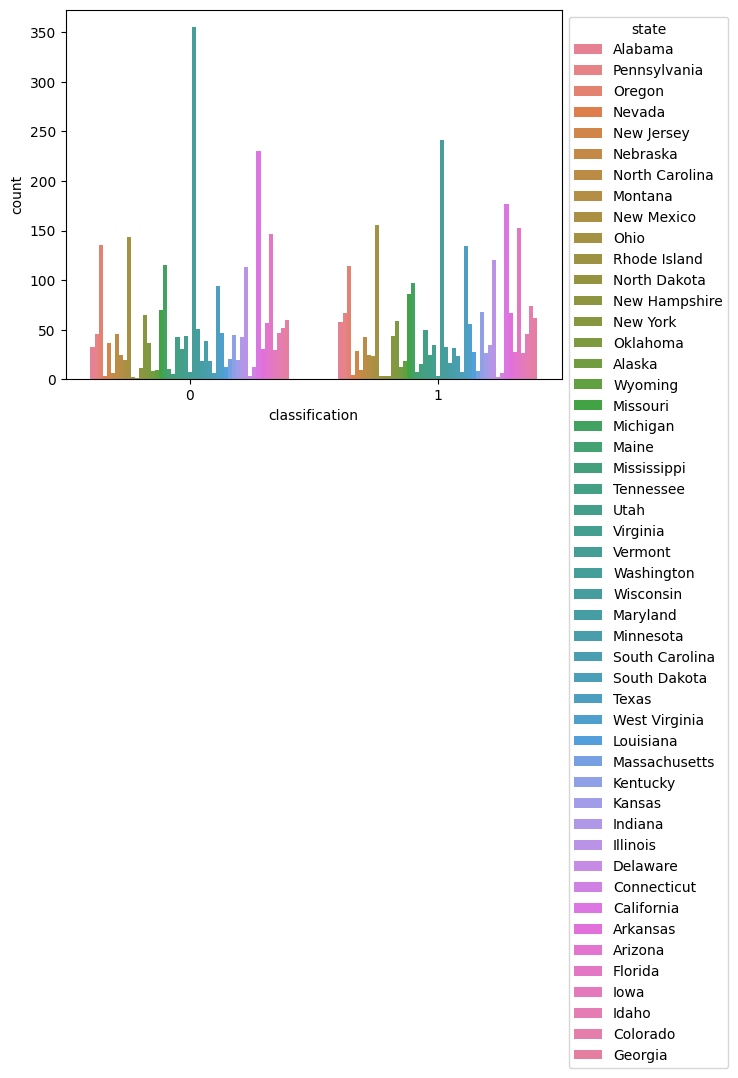

In [52]:
#graphing the classification reports to their respective state
ax = sns.countplot(data=merged_df, x = merged_df['classification'], hue=merged_df['state'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));